In [ ]:
# Insurance Claim Fraud Detection Project

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [12]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv")

In [13]:
df.head()

,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y


In [14]:
header_names=['Months_as_Customers','Age','Policy_Number','Policy_bind_date','Policy_State','Policy_csl','Policy_deductable','Policy_Annual_Premium','Umbrella_limit','Insured_Zip','Insured_Sex','Insured_education_level','Insured_Occupation','Insured_Hobbies','Insured_Relationship','Capital-Gains','Capital-Loss','Incident_Date','Incident_Type','Collision_Type','Incident_Severity','Authorities_Contacted','Incident_State','Incident_City','Incident_Location','Incident_Hour_of_the_Day','Number of Vehicles Involved','Property Damage','Bodily Injuries','Witnesses','Police Report Available','Total Claim Amount','Injury Claim','Property Claim','Vehicle Claim','Auto Make','Auto Model','Auto Year','_C39','Fraud Reported']
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv",header=None,skiprows=1,names=header_names)

In [15]:
df.head(101)

,Months_as_Customers,Age,Policy_Number,Policy_bind_date,Policy_State,Policy_csl,Policy_deductable,Policy_Annual_Premium,Umbrella_limit,Insured_Zip,...,Police Report Available,Total Claim Amount,Injury Claim,Property Claim,Vehicle Claim,Auto Make,Auto Model,Auto Year,_C39,Fraud Reported
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,29,25,235220,01-11-2014,IL,250/500,2000,1352.83,0,464959,...,YES,64890,7210,7210,50470,Nissan,Pathfinder,2013,Y,NaN
97,295,48,740019,17-06-2009,OH,250/500,1000,1148.73,0,439787,...,YES,5400,900,900,3600,Saab,95,1999,N,NaN
98,239,42,246882,20-09-1999,IL,100/300,1000,969.50,0,464839,...,?,5600,700,700,4200,Audi,A3,2007,N,NaN
99,269,41,797613,19-10-1990,IN,100/300,500,1463.82,0,448984,...,?,79300,15860,15860,47580,Saab,92x,2007,N,NaN


In [44]:
df.replace('?', np.nan, inplace = True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Months_as_Customers          999 non-null    int64  
 1   Age                          999 non-null    int64  
 2   Policy_Number                999 non-null    int64  
 3   Policy_bind_date             999 non-null    object 
 4   Policy_State                 999 non-null    object 
 5   Policy_csl                   999 non-null    object 
 6   Policy_deductable            999 non-null    int64  
 7   Policy_Annual_Premium        999 non-null    float64
 8   Umbrella_limit               999 non-null    int64  
 9   Insured_Zip                  999 non-null    int64  
 10  Insured_Sex                  999 non-null    object 
 11  Insured_education_level      999 non-null    object 
 12  Insured_Occupation           999 non-null    object 
 13  Insured_Hobbies     

In [17]:
df.dtypes

Months_as_Customers              int64
Age                              int64
Policy_Number                    int64
Policy_bind_date                object
Policy_State                    object
Policy_csl                      object
Policy_deductable                int64
Policy_Annual_Premium          float64
Umbrella_limit                   int64
Insured_Zip                      int64
Insured_Sex                     object
Insured_education_level         object
Insured_Occupation              object
Insured_Hobbies                 object
Insured_Relationship            object
Capital-Gains                    int64
Capital-Loss                     int64
Incident_Date                   object
Incident_Type                   object
Collision_Type                  object
Incident_Severity               object
Authorities_Contacted           object
Incident_State                  object
Incident_City                   object
Incident_Location               object
Incident_Hour_of_the_Day 

In [46]:
df.isna().sum()

Months_as_Customers              0
Age                              0
Policy_Number                    0
Policy_bind_date                 0
Policy_State                     0
Policy_csl                       0
Policy_deductable                0
Policy_Annual_Premium            0
Umbrella_limit                   0
Insured_Zip                      0
Insured_Sex                      0
Insured_education_level          0
Insured_Occupation               0
Insured_Hobbies                  0
Insured_Relationship             0
Capital-Gains                    0
Capital-Loss                     0
Incident_Date                    0
Incident_Type                    0
Collision_Type                 178
Incident_Severity                0
Authorities_Contacted           91
Incident_State                   0
Incident_City                    0
Incident_Location                0
Incident_Hour_of_the_Day         0
Number of Vehicles Involved      0
Property Damage                360
Bodily Injuries     

In [18]:
df.columns

Index(['Months_as_Customers', 'Age', 'Policy_Number', 'Policy_bind_date',
       'Policy_State', 'Policy_csl', 'Policy_deductable',
       'Policy_Annual_Premium', 'Umbrella_limit', 'Insured_Zip', 'Insured_Sex',
       'Insured_education_level', 'Insured_Occupation', 'Insured_Hobbies',
       'Insured_Relationship', 'Capital-Gains', 'Capital-Loss',
       'Incident_Date', 'Incident_Type', 'Collision_Type', 'Incident_Severity',
       'Authorities_Contacted', 'Incident_State', 'Incident_City',
       'Incident_Location', 'Incident_Hour_of_the_Day',
       'Number of Vehicles Involved', 'Property Damage', 'Bodily Injuries',
       'Witnesses', 'Police Report Available', 'Total Claim Amount',
       'Injury Claim', 'Property Claim', 'Vehicle Claim', 'Auto Make',
       'Auto Model', 'Auto Year', '_C39', 'Fraud Reported'],
      dtype='object')

In [19]:
df.nunique()

Months_as_Customers            391
Age                             46
Policy_Number                  999
Policy_bind_date               950
Policy_State                     3
Policy_csl                       3
Policy_deductable                3
Policy_Annual_Premium          990
Umbrella_limit                  11
Insured_Zip                    994
Insured_Sex                      2
Insured_education_level          7
Insured_Occupation              14
Insured_Hobbies                 20
Insured_Relationship             6
Capital-Gains                  338
Capital-Loss                   354
Incident_Date                   60
Incident_Type                    4
Collision_Type                   4
Incident_Severity                4
Authorities_Contacted            4
Incident_State                   7
Incident_City                    7
Incident_Location              999
Incident_Hour_of_the_Day        24
Number of Vehicles Involved      4
Property Damage                  3
Bodily Injuries     

In [20]:
df.shape

(999, 40)

In [21]:
df.describe()

,Months_as_Customers,Age,Policy_Number,Policy_deductable,Policy_Annual_Premium,Umbrella_limit,Insured_Zip,Capital-Gains,Capital-Loss,Incident_Hour_of_the_Day,Number of Vehicles Involved,Bodily Injuries,Witnesses,Total Claim Amount,Injury Claim,Property Claim,Vehicle Claim,Auto Year,Fraud Reported
count,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,0.0
mean,203.829830,38.938939,546263.326326,1136.136136,1256.255495,1.102102e+06,501249.605606,25097.897898,-26820.520521,11.650651,1.839840,0.991992,1.486486,52743.073073,7434.344344,7393.943944,37914.784785,2005.104104,NaN
std,115.103809,9.140370,257190.576942,612.155989,244.243187,2.298293e+06,71728.919924,27871.869471,28105.366259,6.951671,1.019044,0.820538,1.111773,26408.011569,4883.309038,4823.859773,18890.397013,6.018773,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.500000,32.000000,335913.500000,500.000000,1089.185000,0.000000e+00,448373.000000,0.000000,-51500.000000,6.000000,1.000000,0.000000,1.000000,41775.000000,4290.000000,4440.000000,30275.000000,2000.000000,NaN
50%,199.000000,38.000000,533940.000000,1000.000000,1257.040000,0.000000e+00,466498.000000,0.000000,-24100.000000,12.000000,1.000000,1.000000,1.000000,57970.000000,6780.000000,6750.000000,42080.000000,2005.000000,NaN
75%,276.000000,44.000000,759459.500000,2000.000000,1415.710000,0.000000e+00,603254.000000,51000.000000,0.000000,17.000000,3.000000,2.000000,2.000000,70550.000000,11310.000000,10870.000000,50775.000000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


<Axes: >

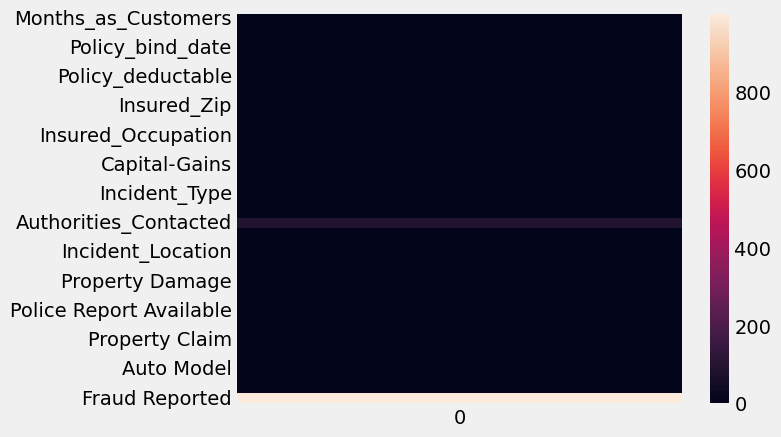

In [22]:
sns.heatmap(df.isnull().sum().to_frame())

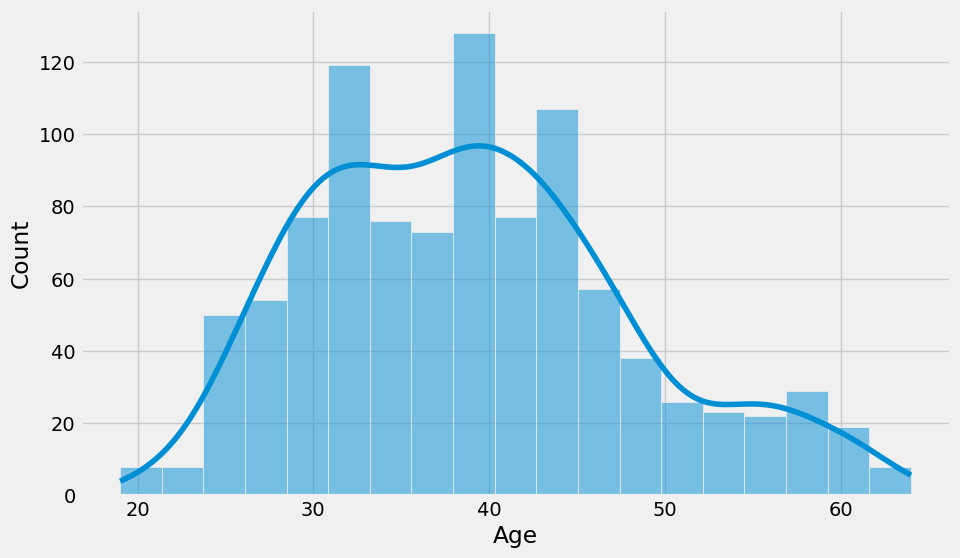

In [74]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.histplot(df['Age'],kde=True);

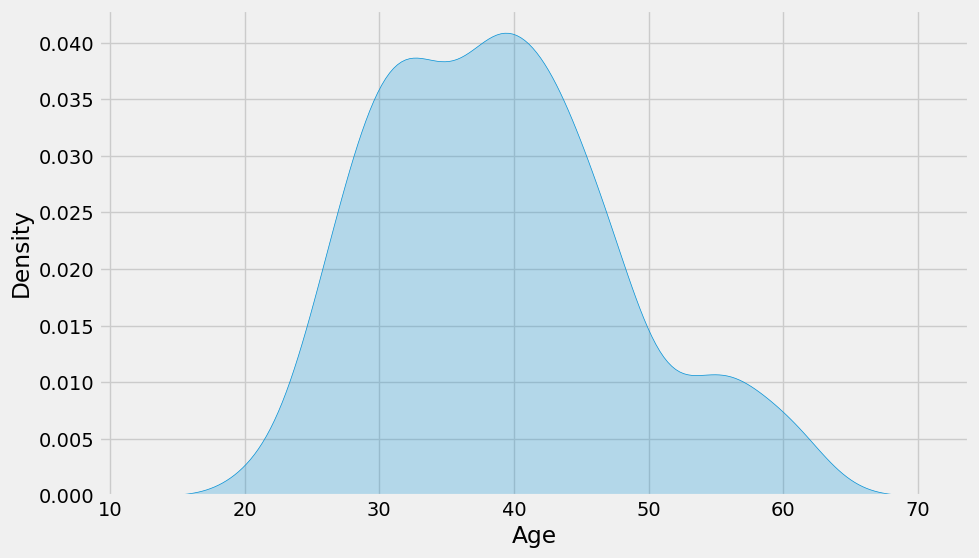

In [76]:
sns.kdeplot(df['Age'],fill=True);

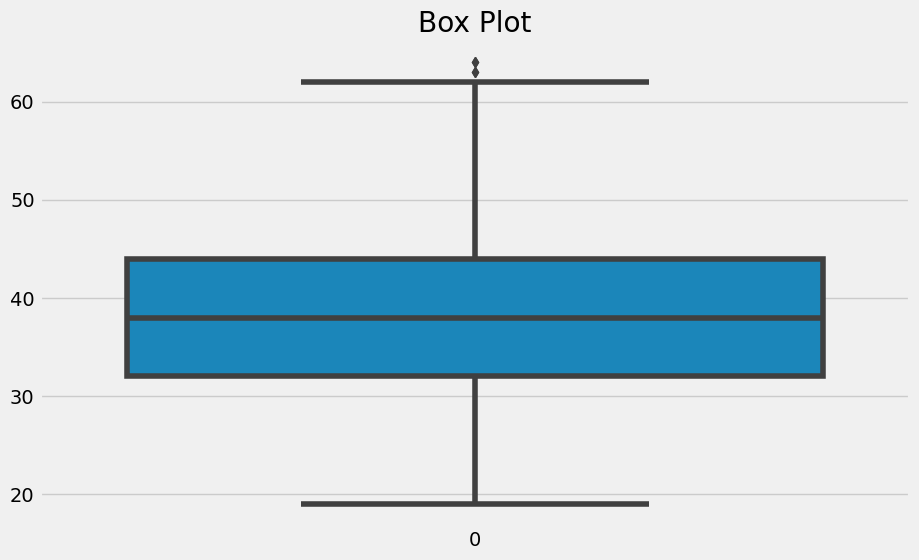

In [78]:
sns.boxplot(df['Age'])
plt.title('Box Plot');

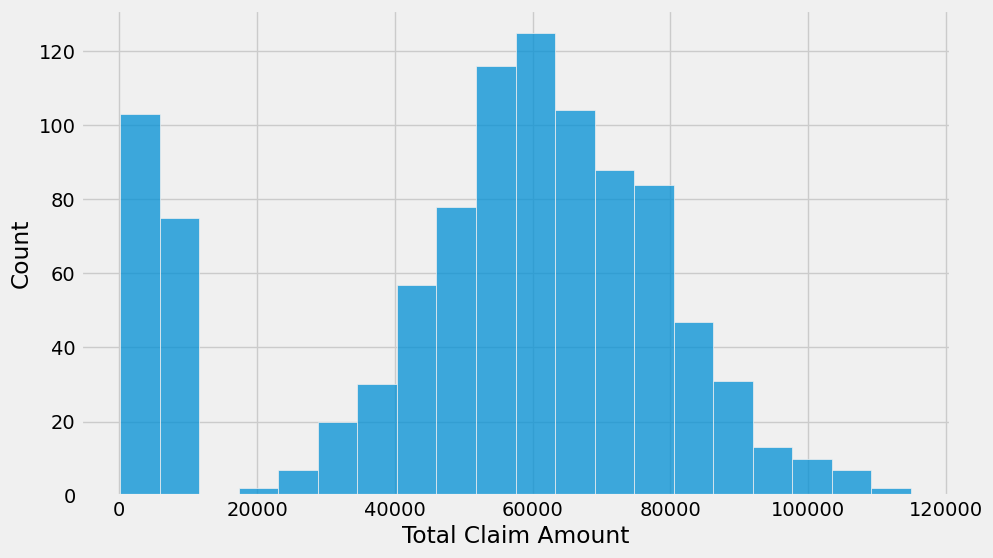

In [80]:
sns.histplot(df['Total Claim Amount']);

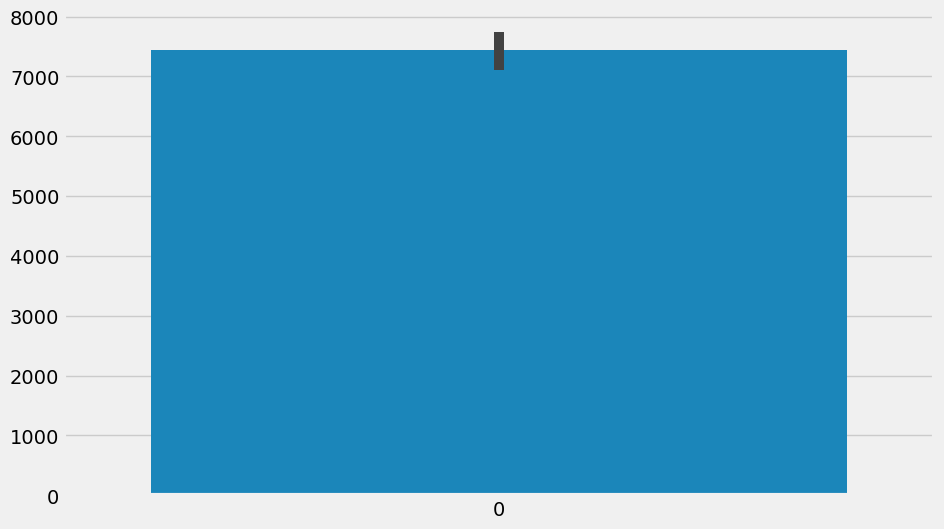

In [81]:
sns.barplot(df['Injury Claim'],fill=True);

ValueError: 'explode' must be of length 'x'

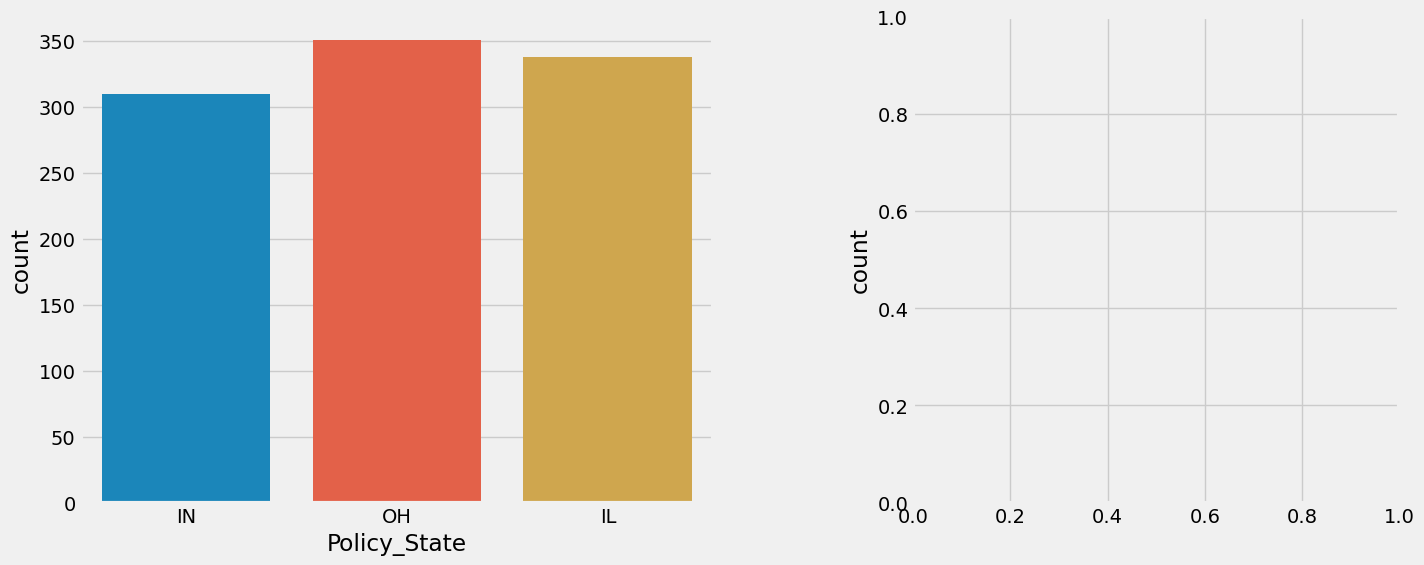

In [86]:
fig = plt.figure(figsize=(16,6))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['Policy_State'],ax=ax1)
df['Policy_State'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2,explode=[0.1]*4);